In [137]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [138]:
#Load dataset
df = pd.read_csv(r"C:\Users\91932\Downloads\dataframe_.csv")

In [139]:

df.head()

,input,output
0,-122.74,-130.57
1,-121.53,-129.94
2,-134.92,-130.14
3,-120.61,-125.76
4,-129.89,-112.79


In [140]:
df.describe()

,input,output
count,1696.00,1696.00
mean,1.16,-34.09
std,79.01,65.77
min,-134.96,-132.42
25%,-63.39,-80.03
50%,10.20,-50.47
75%,70.26,-11.00
max,134.61,134.43


In [141]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [142]:
df.describe()

,input,output
count,1696.00,1696.00
mean,1.16,-34.09
std,79.01,65.77
min,-134.96,-132.42
25%,-63.39,-80.03
50%,10.20,-50.47
75%,70.26,-11.00
max,134.61,134.43


In [143]:
#find missing values
df.isnull().sum()

input     1
output    1
dtype: int64

In [144]:
df.isnull().any()

input     True
output    True
dtype: bool

In [145]:
df

,input,output
0,-122.74,-130.57
1,-121.53,-129.94
2,-134.92,-130.14
3,-120.61,-125.76
4,-129.89,-112.79
...,...,...
1692,25.41,-76.38
1693,29.54,-82.80
1694,31.63,-87.00
1695,29.09,-104.94


In [146]:
#dropping null values
df.dropna(inplace = True)

In [147]:
df.isnull().any()

input     False
output    False
dtype: bool

In [148]:
df

,input,output
0,-122.74,-130.57
1,-121.53,-129.94
2,-134.92,-130.14
3,-120.61,-125.76
4,-129.89,-112.79
...,...,...
1692,25.41,-76.38
1693,29.54,-82.80
1694,31.63,-87.00
1695,29.09,-104.94


<AxesSubplot:>

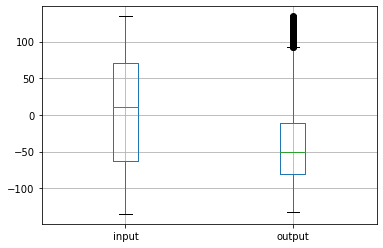

In [149]:
#using boxplot plotting outliers 
df.boxplot()

<AxesSubplot:xlabel='output'>

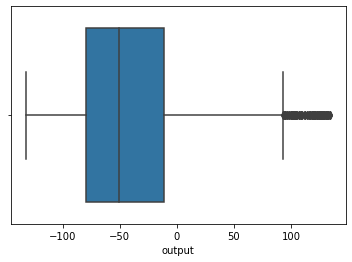

In [150]:
sns.boxplot(df["output"])

In [151]:
#finding percentage of outliers
def find_outliers(df, column, verbose = False):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_boundary = q1 - (1.5 * IQR)
    upper_boundary = q3 + (1.5 * IQR)
    outliers = df[(df[column] < lower_boundary) | (df[column] > upper_boundary)]
    if verbose:
        display(outliers)
        print("Outliers Percentage :: ", (len(outliers) / len(df)) * 100, "%")
    return(outliers)
    

In [152]:
find_outliers(df, "output") 

,input,output
339,114.23,100.49
341,94.67,103.82
342,114.63,94.00
343,103.62,109.97
345,131.91,94.64
...,...,...
1470,133.10,133.79
1471,124.63,129.00
1472,121.06,126.75
1473,133.02,132.06


In [153]:
outliers_salary = find_outliers(df,"output", verbose = True)

,input,output
339,114.23,100.49
341,94.67,103.82
342,114.63,94.00
343,103.62,109.97
345,131.91,94.64
...,...,...
1470,133.10,133.79
1471,124.63,129.00
1472,121.06,126.75
1473,133.02,132.06


Outliers Percentage ::  8.49056603773585 %


<AxesSubplot:xlabel='input', ylabel='output'>

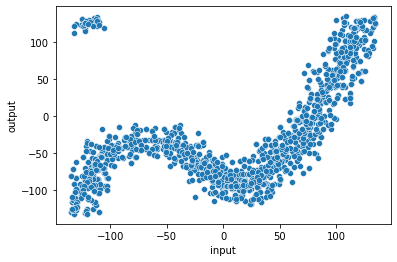

In [154]:
#scatterplot
sns.scatterplot(df["input"],df["output"])

In [176]:
#define X and y values
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [177]:
X

array([[-122.7406674 ],
       [-121.5314194 ],
       [-134.917019  ],
       ...,
       [  31.6333313 ],
       [  29.09145773],
       [  17.14529595]])

In [178]:
y

array([-130.5720846, -129.9389289, -130.1418321, ...,  -87.       ,
       -104.9430524, -101.7268941])

In [179]:
#importing ml library
from sklearn.model_selection import train_test_split

In [180]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

In [160]:
X_train,X_test,y_train,y_test

(array([[-120.0696243 ],
        [-116.3328387 ],
        [  46.73433139],
        ...,
        [  82.6333313 ],
        [-117.3666687 ],
        [ -23.3666687 ]]),
 array([[-3.48218737e+01],
        [-1.19366669e+02],
        [ 1.28036571e+02],
        [ 1.02633331e+02],
        [ 9.26333313e+01],
        [-8.93666687e+01],
        [-1.17213704e+02],
        [-1.90066356e+01],
        [ 3.62746198e+00],
        [-9.97125535e+01],
        [ 8.62740089e+01],
        [ 1.22633331e+02],
        [ 6.26333313e+01],
        [ 4.88754613e+01],
        [-4.93666687e+01],
        [-9.36666870e+00],
        [ 7.91422045e-01],
        [-8.84900956e+01],
        [ 1.87466308e+01],
        [-2.08067851e+01],
        [-1.23003227e+02],
        [ 9.56384899e+01],
        [ 6.66333313e+01],
        [-1.17880300e+01],
        [-3.17888073e+01],
        [-7.34400993e+00],
        [ 6.04582180e+01],
        [-1.22813233e+02],
        [-5.89881963e+01],
        [ 3.05564537e+01],
        [ 4.46333313e+01]

In [181]:
#import regression model
from sklearn.linear_model import LinearRegression

In [182]:
lr_model = LinearRegression()

In [183]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [195]:
#prediction
y_pred = lr_model.predict(X_test)
y_pred

array([-4.86559021e+01, -8.48458923e+01,  2.10567928e+01,  1.01827586e+01,
        5.90218879e+00, -7.20041827e+01, -8.39243008e+01, -4.18860790e+01,
       -3.21973954e+01, -7.64328109e+01,  3.18003641e+00,  1.87438984e+01,
       -6.93952079e+00, -1.28286732e+01, -5.48819032e+01, -3.77596238e+01,
       -3.34113821e+01, -7.16289594e+01, -2.57255295e+01, -4.26566455e+01,
       -8.64025464e+01,  7.18856792e+00, -5.22729285e+00, -3.87961044e+01,
       -4.73575769e+01, -3.68938106e+01, -7.87059324e+00, -8.63212182e+01,
       -5.90004653e+01, -2.06702523e+01, -1.46445465e+01,  1.87438984e+01,
       -3.43354105e+01,  1.52938055e+01, -6.30189053e+01, -7.72616089e+01,
       -5.97504014e-01, -4.20401936e+01, -8.62546311e+01, -8.97356986e+01,
        2.27146614e+01, -7.86561283e+01, -3.12891548e+01, -1.56637734e+00,
       -8.65603377e+01,  8.89858769e+00, -7.37164106e+01, -4.31227271e+01,
       -2.93059766e+01, -8.32779035e+01, -5.97504014e-01, -8.52739492e+01,
       -8.05113298e+01, -

In [197]:
X_train

array([[-120.0696243 ],
       [-116.3328387 ],
       [  46.73433139],
       ...,
       [  82.6333313 ],
       [-117.3666687 ],
       [ -23.3666687 ]])

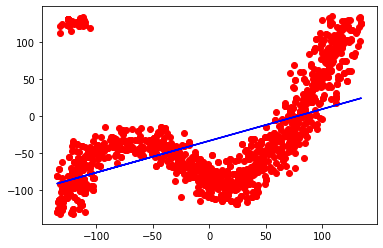

In [193]:
plt.scatter(X_train, y_train,color="red")
plt.plot(X_train,lr_model.predict(X_train), color="blue")

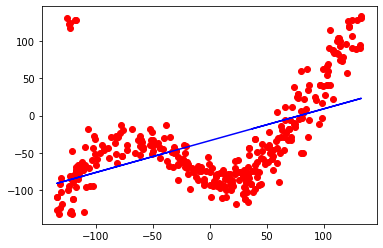

In [198]:
plt.scatter(X_test, y_test,color="red")
plt.plot(X_test,lr_model.predict(X_test), color="blue")